# Explore here

In [8]:
import pandas as pd

total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

total_data.head()

date      sales
0  2022-09-03 17:10:08.079328  55.292157
1  2022-09-04 17:10:08.079328  53.803211
2  2022-09-05 17:10:08.079328  58.141693
3  2022-09-06 17:10:08.079328  64.530899
4  2022-09-07 17:10:08.079328  66.013633

In [9]:
# transforming string of date to Datetime object

total_data["date"]=pd.to_datetime(total_data.date)

total_data= total_data.set_index("date")
ts_total=total_data["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

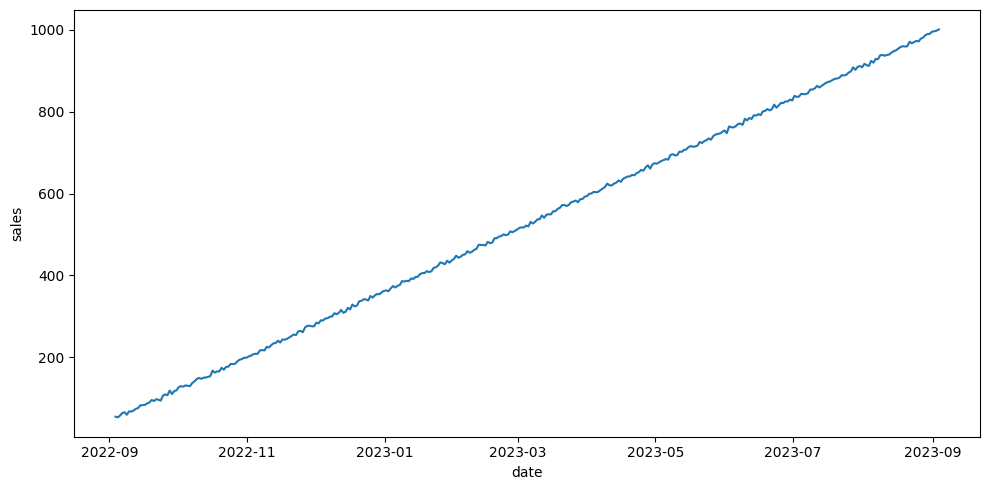

In [10]:
# ploting
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, axis = plt.subplots(figsize= (10,5))

sns.lineplot(data = ts_total)

plt.tight_layout()


plt.show()



In [12]:
# building and analayzing time series 
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest= adfuller(timeseries,autolag="AIC")
    dfoutput= pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key]= value
    return dfoutput

test_stationarity(ts_total)



Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64